In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


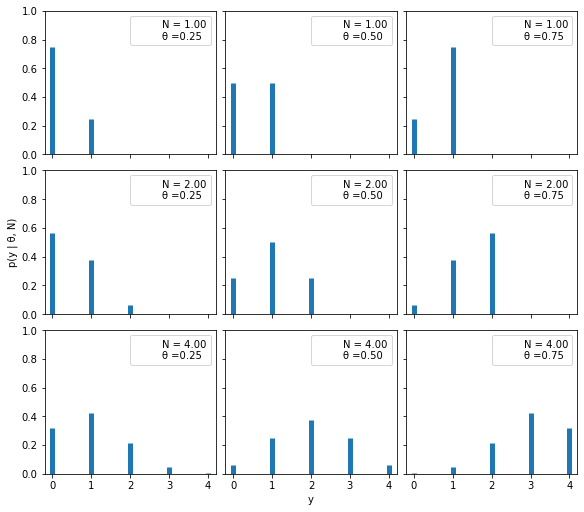

In [2]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success
x = np.arange(0, max(n_params)+1) #counts(discrete. Hence pmf not pdf)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, #figure,axis 
sharey=True,
figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)  #dbinom;pmf
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ ={:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[2,1].set_xlabel('y')                   #axis label at 3,2 ie index 2,1
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)

### Prior as Beta Distribution

Text(0.07, 0.5, 'p(θ)')

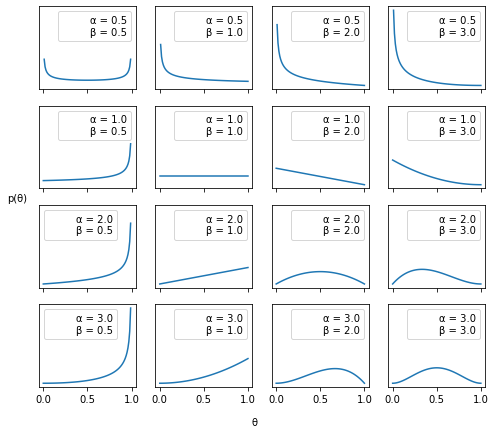

In [3]:
params=[0.5,1,2,3]
x=np.linspace(0,1,100)

f,ax=plt.subplots(len(params),len(params),sharex=True, sharey=True, figsize=(8,7),constrained_layout=False)

for i in range(4):
    for j in range(4):
        a=params[i]
        b=params[j]
        y=stats.beta(a,b).pdf(x)
        ax[i,j].plot(x,y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
        ax[i,j].legend()

ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

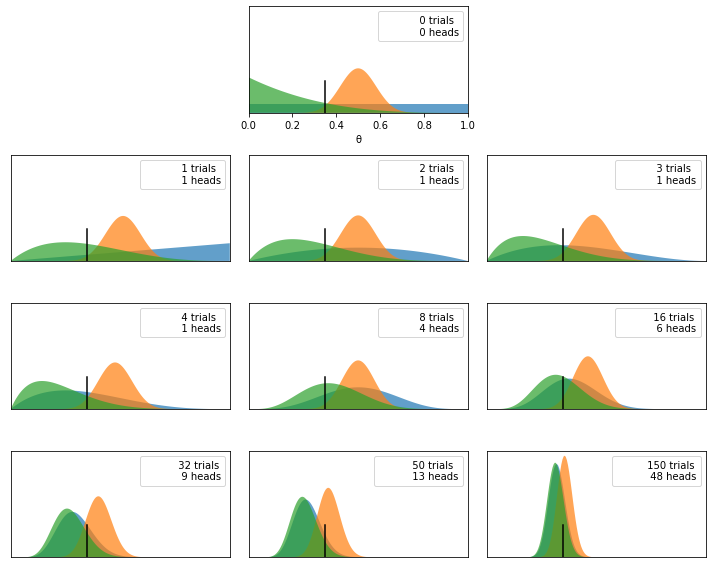

In [26]:

plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150] #no of tosses
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]  #(no of heads)
theta_real = 0.35                         
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    
    y = data[idx]
    
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

<AxesSubplot:title={'center':'θ'}>

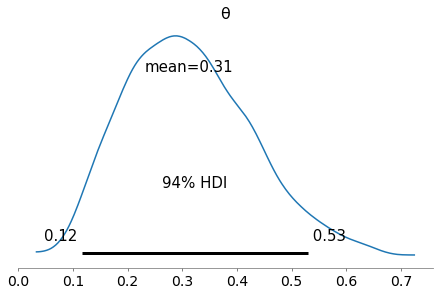

In [29]:
np.random.seed(1)

az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

In [3]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [5]:
with pm.Model() as Our_First_Model:
    Θ = pm.Beta('Θ',alpha=1., beta=1.)
    y = pm.Bernoulli('y',p=Θ, observed=data)
    trace = pm.sample(1000, random_seed=123)

C:\Users\SOBAN\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.


C:\Users\SOBAN\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Θ'}>,
        <AxesSubplot:title={'center':'Θ'}>]], dtype=object)

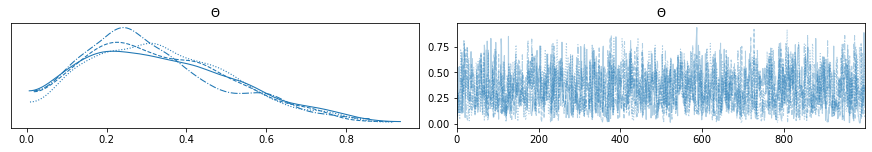

In [6]:
az.plot_trace(trace)

In [7]:
az.summary(trace)

C:\Users\SOBAN\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Θ,0.332,0.18,0.016,0.65,0.005,0.003,1418.0,1928.0,1.0


C:\Users\SOBAN\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'Θ'}>

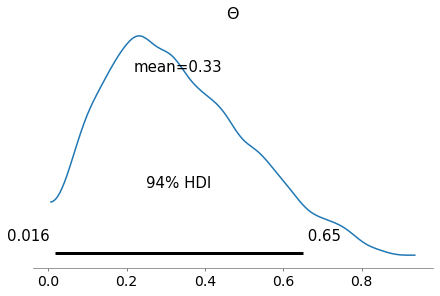

In [8]:
az.plot_posterior(trace)

C:\Users\SOBAN\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'Θ'}>

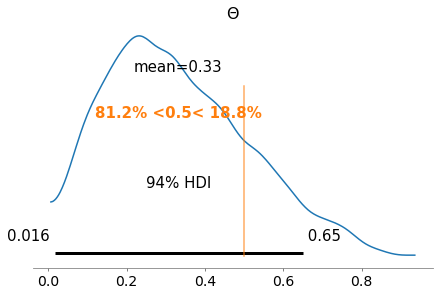

In [9]:
az.plot_posterior(trace, ref_val=0.5)

C:\Users\SOBAN\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'Θ'}>

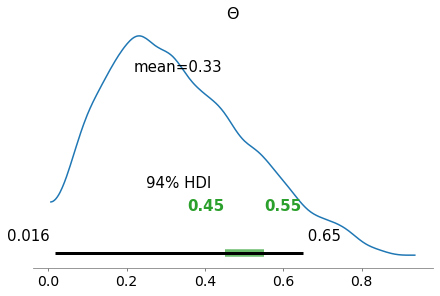

In [10]:
az.plot_posterior(trace, rope=[0.45, .55])

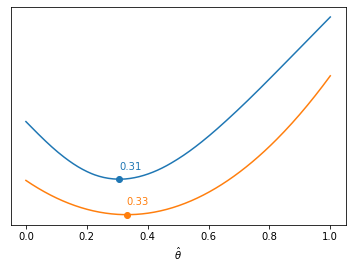

In [11]:
grid = np.linspace(0,1,200)
Θ_pos = trace['Θ']
lossf_a = [np.mean(abs(i - Θ_pos)) for i in grid]
lossf_b = [np.mean((i - Θ_pos)**2) for i in grid]
for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    plt.plot(grid, lossf, c)
    plt.plot(grid[mini], lossf[mini], 'o', color=c)
    plt.annotate('{:.2f}'.format(grid[mini]),(grid[mini], lossf[mini] + 0.03), color=c)
    plt.yticks([])
    plt.xlabel(r'$\hat \theta$')

In [12]:
np.mean(Θ_pos)

0.33183370277313406

In [13]:
np.median(Θ_pos)

0.30799294354216683